In [37]:
# Importing the required libraries
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import warnings
warnings.filterwarnings('ignore')

In [38]:
# Load the dataset into a pandas dataframe
data = pd.read_csv('E:\P288_Clustering_Project\P288_Group1_Clustering_Project_Excelr\Dataset\IQR.csv')

# Creating a DataFrame with the loaded data
df = pd.DataFrame(data)

# checking the dataframe
df

,CO2 Emissions,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Infant Mortality Rate,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 15-64,Population 65+,Population Total,Tourism Inbound,Tourism Outbound,Birth Rate,Internet Usage,Population 0-14,Population Urban
0,87931.0,26.000,26998.000,5.479006e+10,0.035,60.000,0.0340,0.1000,71.0,67.0,0.0,0.6190,0.039,3.171945e+07,1.020000e+08,1.930000e+08,0.020,0.0,0.3420,0.599
1,9542.0,26.000,7499.000,9.129595e+09,0.034,22.000,0.1075,0.2265,47.0,44.0,0.0,0.4990,0.025,1.392493e+07,3.400000e+07,1.460000e+08,0.050,0.0,0.4760,0.324
2,1617.0,26.000,1983.000,2.359122e+09,0.043,15.000,0.0900,0.1200,57.0,53.0,0.0,0.5170,0.029,6.949366e+06,7.700000e+07,5.000000e+07,0.043,0.0,0.4540,0.383
3,4276.0,26.000,1836.000,5.788312e+09,0.047,152.000,0.0540,0.1550,52.0,49.0,0.1,0.5870,0.029,1.755375e+06,2.270000e+08,2.090000e+08,0.027,0.0,0.3830,0.532
4,1041.0,26.000,14338.000,2.610959e+09,0.051,12.000,0.0960,0.1200,52.0,49.0,0.0,0.5050,0.028,1.160794e+07,2.300000e+07,3.000000e+07,0.046,0.0,0.4680,0.178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,8529.0,26.000,14338.000,1.507975e+10,0.061,193.000,0.0200,0.1200,75.0,69.0,0.5,0.6425,0.052,3.242700e+04,6.885000e+08,4.560000e+08,0.020,0.1,0.2995,0.911
2700,8529.0,5.000,46913.625,2.213750e+11,0.118,1291.125,0.0060,0.0330,81.0,76.0,1.0,0.6670,0.136,4.903473e+07,6.341000e+09,4.058250e+09,0.013,0.8,0.1960,0.811
2701,8529.0,7.000,14338.000,5.000435e+10,0.089,1291.125,0.0100,0.1120,80.0,74.0,1.5,0.6390,0.140,3.395253e+06,2.222000e+09,1.028000e+09,0.015,0.5,0.2200,0.948
2702,8529.0,55.625,14338.000,2.213750e+11,0.046,593.000,0.0130,0.1640,78.0,72.0,1.0,0.6520,0.060,2.995478e+07,9.040000e+08,3.202000e+09,0.020,0.5,0.2880,0.889


In [39]:
from sklearn.preprocessing import MinMaxScaler

# Assuming `df` is your DataFrame
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [40]:
# Function to check if a column is symmetric
def is_symmetric(column):
    skewness = column.skew()
    return abs(skewness) < 0.1

# Apply the function to each numeric column in the DataFrame
symmetry_check = df.select_dtypes(include=[np.number]).apply(is_symmetric)

print(symmetry_check)

CO2 Emissions             False
Days to Start Business    False
Energy Usage              False
GDP                       False
Health Exp % GDP          False
Health Exp/Capita         False
Infant Mortality Rate     False
Lending Interest          False
Life Expectancy Female    False
Life Expectancy Male      False
Mobile Phone Usage        False
Population 15-64          False
Population 65+            False
Population Total          False
Tourism Inbound           False
Tourism Outbound          False
Birth Rate                False
Internet Usage            False
Population 0-14            True
Population Urban           True
dtype: bool


In [41]:
# K-Means
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_normalized)
labels_kmeans = kmeans.labels_
print("K-Means labels:")
print(labels_kmeans)

# Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=3)
labels_agg = agg.fit_predict(df_normalized)
print("\nAgglomerative Clustering labels:")
print(labels_agg)

# DBSCAN
dbscan = DBSCAN(eps=0.3)
labels_dbscan = dbscan.fit_predict(df_normalized)
print("\nDBSCAN labels:")
print(labels_dbscan)


K-Means labels:
[2 0 0 ... 2 1 2]

Agglomerative Clustering labels:
[0 2 2 ... 1 0 1]

DBSCAN labels:
[ 0  2  1 ... -1 -1 30]


In [42]:
fig = go.Figure(data=go.Scatter3d(
    x=df_normalized.iloc[:, 0],  # assuming the DataFrame has at least three columns
    y=df_normalized.iloc[:, 1],
    z=df_normalized.iloc[:, 2],
    mode='markers',
    marker=dict(
        size=5,
        color=labels_kmeans,  # set color to the K-Means cluster labels
        colorscale='Viridis',  # choose a colorscale
        opacity=0.8
    )
))

fig.show()


In [43]:
fig = go.Figure(data=go.Scatter3d(
    x=df_normalized.iloc[:, 0],
    y=df_normalized.iloc[:, 1],
    z=df_normalized.iloc[:, 2],
    mode='markers',
    marker=dict(
        size=5,
        color=labels_agg,  # set color to the Agglomerative Clustering labels
        colorscale='Viridis',
        opacity=0.8
    )
))

fig.show()


In [44]:
fig = go.Figure(data=go.Scatter3d(
    x=df_normalized.iloc[:, 0],
    y=df_normalized.iloc[:, 1],
    z=df_normalized.iloc[:, 2],
    mode='markers',
    marker=dict(
        size=5,
        color=labels_dbscan,  # set color to the DBSCAN labels
        colorscale='Viridis',
        opacity=0.8
    )
))

fig.show()


In [45]:
from sklearn.cluster import KMeans
import plotly.graph_objects as go

sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(df_normalized)
    sse.append(km.inertia_)

fig = go.Figure(data=go.Scatter(x=list_k, y=sse, mode='lines+markers'))
fig.update_layout(title='Elbow Method', xaxis_title='Number of clusters k', yaxis_title='Sum of squared distance')
fig.show()


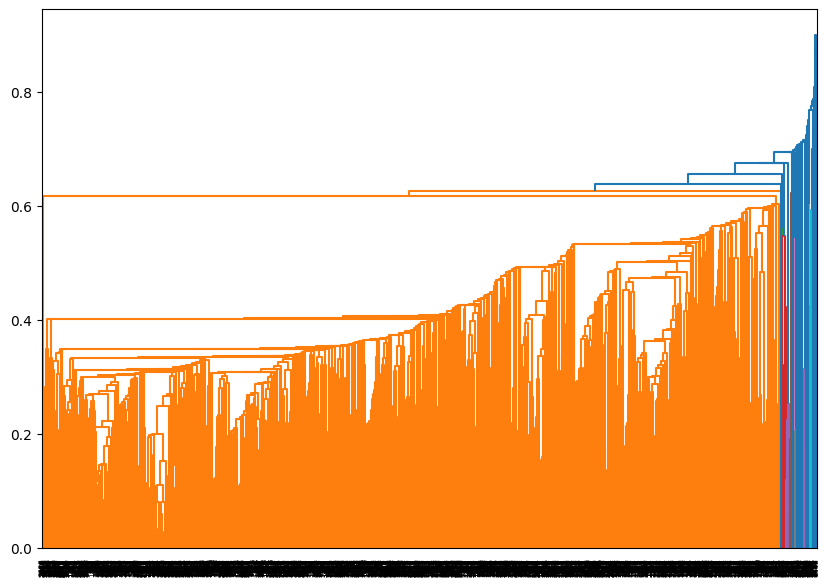

In [46]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

linked = linkage(df_normalized, 'single')

plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.show()


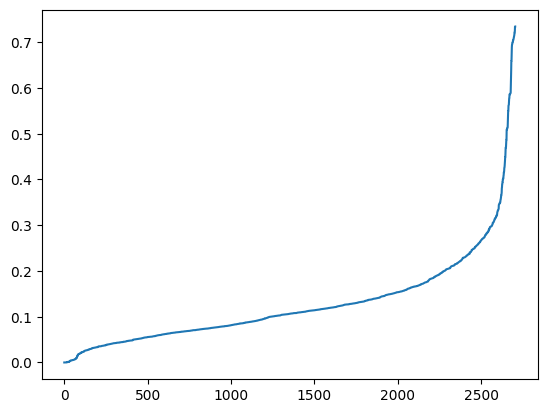

In [47]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df_normalized)
distances, indices = nbrs.kneighbors(df_normalized)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)


In [48]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn import metrics

# Assuming 'df_normalized' is your DataFrame

# K-Means
kmeans = KMeans(n_clusters=3)
labels_kmeans = kmeans.fit_predict(df_normalized)

# Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=3)
labels_agg = agg.fit_predict(df_normalized)

# DBSCAN
dbscan = DBSCAN(eps=0.3)
labels_dbscan = dbscan.fit_predict(df_normalized)

# Calculate metrics
for name, labels in zip(['K-Means', 'Agglomerative', 'DBSCAN'], [labels_kmeans, labels_agg, labels_dbscan]):
    print(f"\n{name}:")
    print(f"Silhouette Score: {metrics.silhouette_score(df_normalized, labels)}")
    print(f"Calinski-Harabasz Index: {metrics.calinski_harabasz_score(df_normalized, labels)}")
    print(f"Davies-Bouldin Index: {metrics.davies_bouldin_score(df_normalized, labels)}")



K-Means:
Silhouette Score: 0.2932325850872667
Calinski-Harabasz Index: 1586.9282389231473
Davies-Bouldin Index: 1.2293117099049238

Agglomerative:
Silhouette Score: 0.2714059233809167
Calinski-Harabasz Index: 1349.7520769147925
Davies-Bouldin Index: 1.2364289451780115

DBSCAN:
Silhouette Score: 0.003926820171041113
Calinski-Harabasz Index: 24.538256499755537
Davies-Bouldin Index: 1.233450013513498


In [49]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn import metrics

# Assuming 'df_normalized' is your DataFrame

# K-Means
kmeans = KMeans(n_clusters=8)
labels_kmeans = kmeans.fit_predict(df_normalized)

# Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=4)
labels_agg = agg.fit_predict(df_normalized)

# DBSCAN
dbscan = DBSCAN(eps=0.2)
labels_dbscan = dbscan.fit_predict(df_normalized)

# Calculate metrics
for name, labels in zip(['K-Means', 'Agglomerative', 'DBSCAN'], [labels_kmeans, labels_agg, labels_dbscan]):
    print(f"\n{name}:")
    print(f"Silhouette Score: {metrics.silhouette_score(df_normalized, labels)}")
    print(f"Calinski-Harabasz Index: {metrics.calinski_harabasz_score(df_normalized, labels)}")
    print(f"Davies-Bouldin Index: {metrics.davies_bouldin_score(df_normalized, labels)}")



K-Means:
Silhouette Score: 0.18571332168068486
Calinski-Harabasz Index: 896.3433016347032
Davies-Bouldin Index: 1.6008781505764618

Agglomerative:
Silhouette Score: 0.2783040634276392
Calinski-Harabasz Index: 1247.93103731772
Davies-Bouldin Index: 1.2464016202450594

DBSCAN:
Silhouette Score: -0.24877903381323227
Calinski-Harabasz Index: 10.187628859407631
Davies-Bouldin Index: 1.215172678567705


In [50]:
from sklearn.mixture import GaussianMixture

# Assuming `df` is your DataFrame
gmm = GaussianMixture(n_components=3)
gmm.fit(df_normalized)

# Predict the cluster for each data point
labels_gmm = gmm.predict(df_normalized)


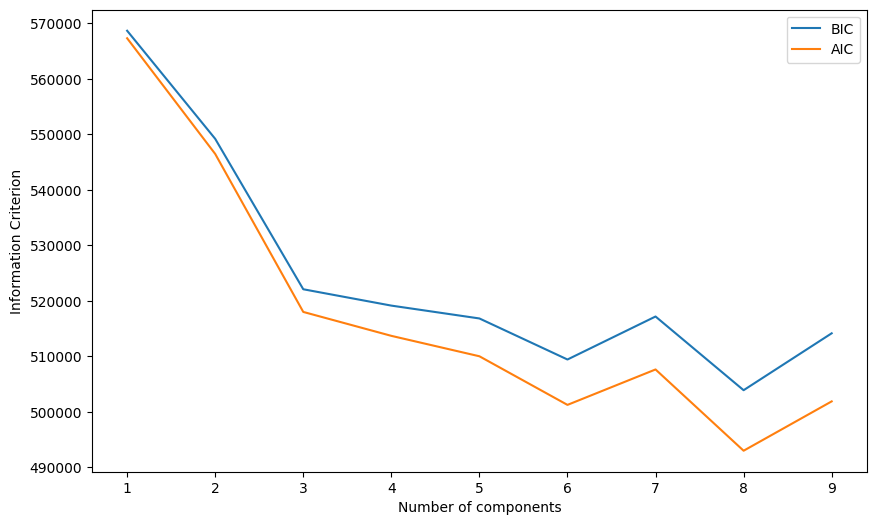

In [51]:
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Assuming `df` is your DataFrame
n_components = range(1, 10)  # Adjust range as needed
bics = []
aics = []

for n in n_components:
    gmm = GaussianMixture(n_components=n)
    gmm.fit(df)
    bics.append(gmm.bic(df))
    aics.append(gmm.aic(df))

plt.figure(figsize=(10, 6))
plt.plot(n_components, bics, label='BIC')
plt.plot(n_components, aics, label='AIC')
plt.xlabel('Number of components')
plt.ylabel('Information Criterion')
plt.legend()
plt.show()


In [52]:
from sklearn.mixture import GaussianMixture

# Assuming `df` is your DataFrame
gmm = GaussianMixture(n_components=8)
gmm.fit(df_normalized)

# Predict the cluster for each data point
labels_gmm = gmm.predict(df_normalized)

In [53]:
from sklearn import metrics

# Assuming `labels_gmm` are the labels predicted by your GMM
print(f"Silhouette Score: {metrics.silhouette_score(df, labels_gmm)}")
print(f"Calinski-Harabasz Index: {metrics.calinski_harabasz_score(df, labels_gmm)}")
print(f"Davies-Bouldin Index: {metrics.davies_bouldin_score(df, labels_gmm)}")


Silhouette Score: -0.15861655325661503
Calinski-Harabasz Index: 2193.199284048159
Davies-Bouldin Index: 7.4583285936553425


In [54]:
import pandas as pd

# Create an empty DataFrame to store the metrics
df_metrics = pd.DataFrame(columns=['Algorithm', 'Silhouette Score', 'Calinski-Harabasz Index', 'Davies-Bouldin Index'])

# Calculate metrics and add them to the DataFrame
for name, labels in zip(['K-Means', 'Agglomerative', 'DBSCAN'], [labels_kmeans, labels_agg, labels_dbscan]):
    silhouette_score = metrics.silhouette_score(df_normalized, labels)
    calinski_harabasz_score = metrics.calinski_harabasz_score(df_normalized, labels)
    davies_bouldin_score = metrics.davies_bouldin_score(df_normalized, labels)
    
    df_metrics = df_metrics.append({'Algorithm': name,
                                    'Silhouette Score': silhouette_score,
                                    'Calinski-Harabasz Index': calinski_harabasz_score,
                                    'Davies-Bouldin Index': davies_bouldin_score}, ignore_index=True)

# Save the DataFrame as a CSV file
df_metrics.to_csv('Minmax.csv', index=False)


AttributeError: 'DataFrame' object has no attribute 'append'